# Predicting the Final Grades of Students

#### Here, grades are calculated using Multiple Linear Regression Technique performed on data collected from UCI.

In [21]:
# Importing dependencies

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Loading Data

In [22]:
df = pd.read_csv("student-mat.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [23]:
df.shape

(395, 33)

In [24]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Getting only Numeric Data

In [25]:
df = df._get_numeric_data()
df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9
391,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16
392,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10


In [26]:
df = df.drop(['G1','G2'], axis=1)
df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9
391,17,3,1,2,1,0,2,4,5,3,4,2,3,16
392,21,1,1,1,1,3,5,5,3,3,3,3,3,7
393,18,3,2,3,1,0,4,4,1,3,4,5,0,10


## Train/Test Split

In [27]:
# Target

y_data = df['G3']                               
y_data

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [28]:
x_data = df.drop('G3', axis=1)
x_data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
0,18,4,4,2,2,0,4,3,4,1,1,3,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4
2,15,1,1,1,2,3,4,3,2,2,3,3,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2
4,16,3,3,1,2,0,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11
391,17,3,1,2,1,0,2,4,5,3,4,2,3
392,21,1,1,1,1,3,5,5,3,3,3,3,3
393,18,3,2,3,1,0,4,4,1,3,4,5,0


In [29]:
# Importing library for train and test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.15, random_state = 1)

print("No of training samples: ", x_train.shape, y_train.shape)
print("No of test samples: ", x_test.shape, y_test.shape)

No of training samples:  (335, 13) (335,)
No of test samples:  (60, 13) (60,)


## Multiple Regression

In [30]:
from sklearn.linear_model import LinearRegression
lre = LinearRegression()

In [31]:
Z = ['age','Medu','Fedu','traveltime','failures','famrel','freetime','goout', 'studytime','Dalc','Walc','health']

In [32]:
# Fitting the data

lre.fit(x_train[Z], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
# R^2 score of TRAINING Data

lre.score(x_train[Z], y_train)

0.1909268444281066

In [34]:
# R^2 score of TEST Data

lre.score(x_test[Z], y_test)

-0.006984790634402938

## Model Prediction

In [35]:
Yhat=lre.predict(x_test[Z])
Yhat[0:5]  

array([ 5.99842948, 12.15311951,  3.79924846, 10.52063269,  9.07586318])

## Visualizing the Model

In [36]:
# Importing library

import seaborn as sns

In [37]:
# Function for the plot

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Characterstics of Student')
    plt.ylabel('Grades')

    plt.show()
    plt.close()

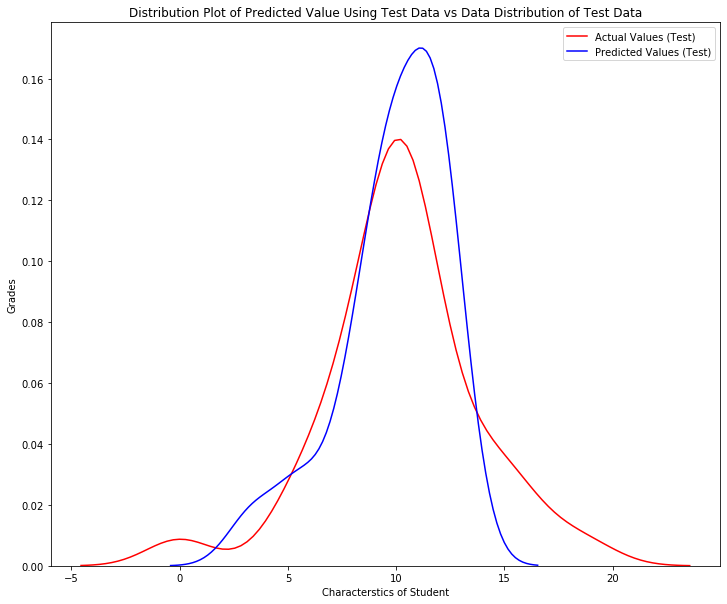

In [38]:
# The distribution of the predicted values of the "TEST-DATA" 

Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,Yhat,"Actual Values (Test)","Predicted Values (Test)",Title)

In [39]:
PRD_df = pd.DataFrame({'Actual': y_test, 'Predicted': Yhat})  
PRD_df 

,Actual,Predicted
146,0,5.998429
379,10,12.153120
247,8,3.799248
197,10,10.520633
368,10,9.075863
165,12,9.698683
278,8,7.857606
295,11,11.492259
186,11,9.696121
330,8,11.316586


## Error Calculation

In [40]:
# Mean Squarred Error

from sklearn.metrics import mean_squared_error

print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(y_test, Yhat))

The mean square error of price and predicted value using multifit is:  11.966056210708091
